$\text{Wydział Matematyki} $\begin{align} \tag*{styczeń 2021} \end{align}$  
\\ 
\text{Politechniki Wrocławskiej}$                                                     

# $$\text{Rzuty wolne w koszykówce}$$
$$\text{Filip Osczepaliński, Adam Łojowski}$$


# Abstrakt

___
<span style='font-family:"Arial"'> 
Zadaniem naszego projektu jest analiza oraz zasymulowanie toru lotu piłki koszykowej posłanej w trakcie rzutu wolnego. Ostatecznym celem pracy jest wykorzystanie symulacji numerycznych do znalezienia wartości prędkości oraz kątów, które zapewnią trafiony rzut do kosza.

</span>

# 1. Wprowadzenie
_ _ _
<span style='font-family:"Arial"'> 
    <p>Rzut wolny, jest to w koszykówce specjalna
        okazja do zdobycia punków w momencie, gdy ten zostaje sfaulowany, bądź drużyna przeciwna popełni błąd techniczny. Rzut ten wykonuje się z lini wolnej, oddalonej od kosza o 3.96m(13ft.) według ligi **NBA**.
    </p>
    <p>Z racji, że w ciągu jednego meczu może paść łącznie kilkanaście, a nawet i kilkadziesiąt rzutów wolnych, warto przyjrzeć się bliżej temu zagadnieniu od matematycznej strony.</p>
    <p>
        Układ współrzędnych określony przez $x,y$, gdzie $x$ to oś biegnąca równolegle do boiska, w najprostszym przykładzie do jego dłuższego boku, a $y$ będzie określać wysokość. W takim układzie możemy określić wartości składowe wektora prędkości początkowej jako </p> 
    <p>$$\left\{
    \begin{array}\\
        \dot{x}=v_{0}cos \theta_{0}\\
        \dot{y}= v_{0}sin \theta_{0}
    \end{array}
    \right.$$</p>

    

    
    
    
</span> 


<span style='font-family:"Arial"'>
W tym przypadku $v_0$ będzie wartością prędkości początkowej, a $\theta_0$ kątem wyrzutu. Podczas naszej pracy będziemy chcieli zasymulować lot piłki koszykowej wykorzystując do tego kilka modeli matematycznych. Oczywiście, naszym zadaniem jest znalezienie takich wartości parametrów $v_0$ i $\theta_0$, przy których piłka wpadnie do kosza.
</span>

<span style='font-family:"Arial"'>
By tego dokonać, będziemy musieli zdefiniować stałe fizyczne, które będą niebędne do przeprowadzenia symulacji. Dodatkowo wykorzystamy pozostałe parametry takie jak wymiary boiska, piłki i kosza, które będą odpowiadać oficjalnom standardom National Basketball Association, czyli najpopularniejszej ligi koszykarskiej.
</span>

1. Main list <br>
 a. Sub-list <br>
 b. sub list 
2. Main list
* main list 

## 1.1 Stałe używane w symulacjach
___
$\begin{aligned}
&\text{masa piłki: } && \text{m} = 0.635 \; \text{kg} \\
&\text{promień piłki: } && \text{R} = 0.12 \; \text{m} \\
&\text{średnica piłki: } && \text{D} = 0.24 \; \text{m} \\
&\text{objętość piłki: } && \text{V} = 0.007 \; \text{m}^3\\
&\text{pole przekroju poprzecznego piłki:} && \text{A} = 0.18 \; \text{m}^2 \\
&\text{moment bezwładności piłki: } && \text{I} = \frac{2}{3}\text{mR}^2 = 0.006 \; \text{kg} \cdot \text{m}^2 \\
&\text{współczynnik oporu powietrza dla piłki: } && \text{C}_\text{X} = 0.24 \\
&\text{współczynnik sprężystości piłki: } && \text{k} = 45000 \; \tfrac{\text{N}}{\text{m}} \\
&\text{współczynnik siły nośnej dla piłki: } && \text{C}_\text{L} = 0.25 \; \tfrac{\text{rad}}{s} \\
&\text{współczynnik tłumienia w kontakcie z tablicą: } && \text{C}_\text{B} = 24 \; \tfrac{\text{Ns}}{\text{m}} \\
&\text{współczynnik tarcia piłki w kontakcie z tablicą: } && \mu_{\operatorname{board}} = 0.6 \\
&\text{współczynnik tarcia piłki w kontakcie z obręczą: } && \mu_{\operatorname{rim}} = 0.5 \\
&\text{promień przekroju poprzecznego obręczy: } && R_{\operatorname{rim}} = 0.009 \; \text{m} \\
&\text{przyspieszenie grawitacyjne: } && \text{g} = 9.81 \; \tfrac{\text{m}}{\text{s}^2} \\
&\text{gęstość powietrza: } && \rho = 1.225 \; \tfrac{\text{kg}}{\text{m}^3} \\
\end{aligned}$

*współczynnik siły nośnej = współczynnik Magnusa?

In [1]:
import sys
#Piłka
m = 0.635
R = 0.12
D = 0.24
V = 0.007
A = 0.18 
I = 0.006
CX = 0.24
k = 45000
CL = 0.25
#Pozostałe stałe fizyczne 
g = 9.81
ro = 1.225
#omega = w

## 1.2 Oznaczenia potrzebnych odległości i wymiarów
_ _ _

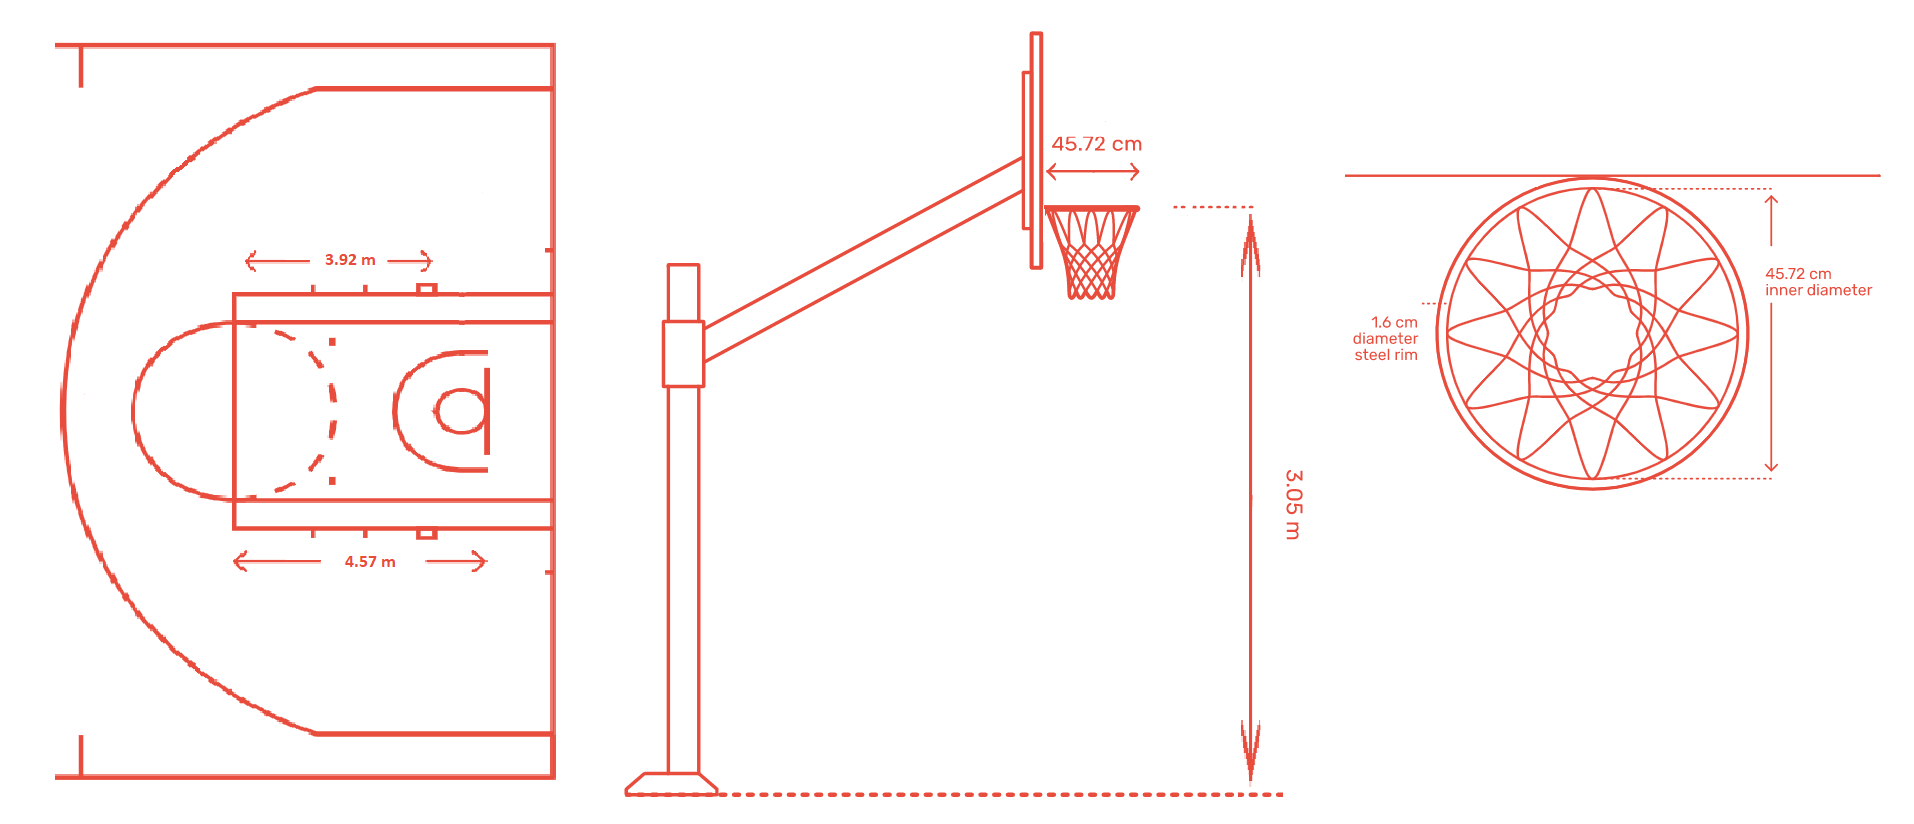

In [2]:
#Wysokość garcza
h_player = 1.77
#Kosz 
R_hoop = 0.23
R_rim = 0.008
x_rim_board = 0.15
#Boisko
free_throw_line_x = 3.92
y_rim = 3.05
y_board = 2.9
h_board = 0.9
x_rim_front = 3.936
x_rim_back = 4.412
x_board = 4.57;
B = ro*V*g


# 2. Sformułowanie zagadnienia
***

<span style='font-family:"Arial"'>
Będziemy rozpatrywać rzut wolny, wykonany przez osobę posiadającej 1.77 m wzrostu. Taki bowiem jest średni wzrost mężczyzn w Polsce. Zawodnik stoi w odlełości 3.96 m od lini kosza. Podczas rzutu, koszykarz nadaje piłce prędność początkową $v_0$ oraz prędkość kątową $\omega$.
    
Dodatkowo zakładamy, że:
* piłka jest idealną, jednorodną sferą o promieniu $R$
* piłka porusza się wyłącznie wzdłóż osi $x$ oraz $y$
* wektor prędkości kątowej $\omega$ jest prostopadły do płaszczyzny osi $x$ oraz $y$
* odbicie piłki od obręczy i tarczy jest idealnie sprężyste
</span>

# 3. Modele
___

<span style='font-family:"Arial"'>
Na samym początku załóżmy, że piłka obraca się na płaszczyźnie XY.
</span>

## 3.1 Siła oporu powietrza i siła ciężkości
___

<span style='font-family:"Arial"'>
Jeśli myślimy o rzucie jakimś przedmiotem, odrazu przychodzi nam na myśl siła ciężkości i opór powietrza. Oczywiście jest to jak najbardziej dobre myślnie i to będą nasze pierwsze modele.
</span>

### Siła ciękżości
___

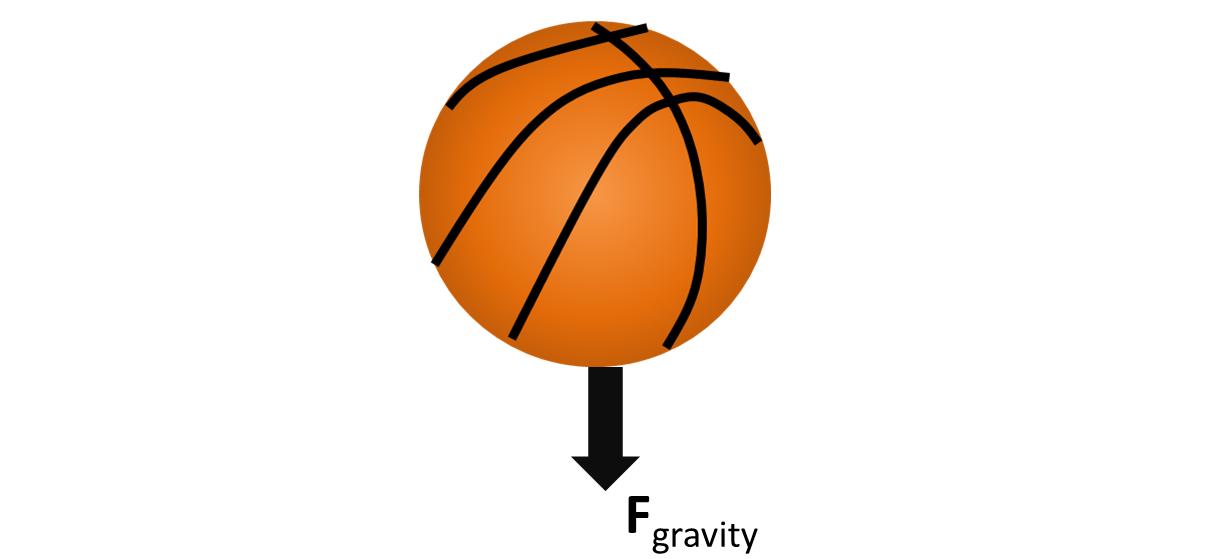

<span style='font-family:"Arial"'>
Siła ciężkości jest skierowana prostopadle do podłoża (Ziemi) i jest podana wzorem:
$\newline$
    $$F_{G}=-mg\hat{j}$$
</span>

### Siła oporu powietrza
___

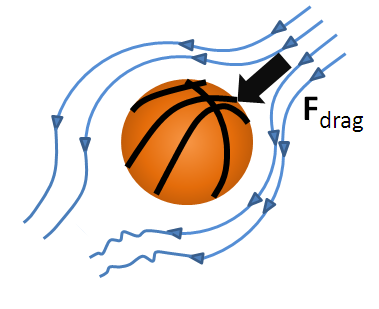

<span style='font-family:"Arial"'>
Siła oporu powietrza jest skierowana w przeciwną stronę niż wektor prędkości i jest podana równaniem:
    $\newline$
    $$F_{O}=-k_{0}\vec{v}=-3\pi\mu D\vec{v}$$,
gdzie $\mu$ = $18.1 \cdot 10^{-6}\frac{\text{Nm}}{\text{s}}$ oznacza lepkość dynamiczną powietrza w temperaturze $20^{\circ}C$ i przy ciśnieniu 1013 hPa. 
    
Ale ponieważ $v$ jest pochodna $x$ i $y$ to zapiszemy za pomocą $\vec{v} = [\dot{x},\dot{y}] = \dot{x}\hat{i} + \dot{y}\hat{j}$ to równanie przyjmuje postać:
    $\newline$
    $$F_{O}=-3\pi\mu D\vec{v}=-3\pi\mu D(\dot{x}\hat{i}+\dot{y}\hat{j})$$

Wykorzystując równanie Newtona otrzymujemy:
    $\newline$
    $$\begin{cases}
    m\ddot{x} = -k_o\dot{x} \\ m\ddot{y} = -mg - k_o\dot{y}
    \end{cases}.$$    
</span>

<span style='font-family:"Arial"'>
Oba równania możemy rozwiązać za pomocą rodzielności zmiennych. Stosując podstawowe całkowanie oraz zakładając że; $ x(0) = 0, \; y(0) = 0,  \dot{x}(0) = v_0\cos{\theta_0},  \dot{y}(0) = v_0\sin{\theta_0}$, dostajemy równania
    $\newline$
$$\begin{cases} x(t) = \frac{m}{k_o}v_{0}\cos{\theta_0}(1 - e^{-\frac{k_o}{m}t})
\\ y(t) = -\frac{mg}{k_o}t - \frac{m}{k_o}(v_0\sin{\theta_0} + \frac{mg}{k_o})e^{-\frac{k_o}{m}t} + \frac{m}{k}(v_0\sin{\theta_0} + \frac{mg}{k_o})
\end{cases}$$
</span>

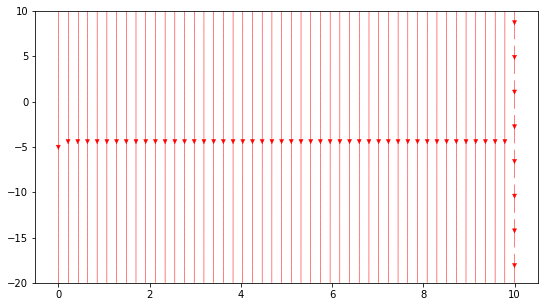

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from math import sqrt, pow, pi, cos, sin

k_0 = 18.1*pow(10,-6)*3*pi*0.24
def dF(x, y):
    return -k_0*x, -m*g-k_0*y
X, Y = np.meshgrid(np.linspace(0, 10.0), np.linspace(-20, 10.0))
C, V = X, Y
dX, dY = dF(C, V)
fig = plt.figure(figsize = (9,5))
plt.streamplot(X, Y, dX, dY, color='r', linewidth=0.5, density=1.6)
plt.show()

<span style='font-family:"Arial"'>
Analizują wykres, moża zauważyć, że prędkość dla x jest stała i nie nie zmienia się. Z tego można wnioskować, że opór powietrza ma znikomy wpływ na prędkość poziomom. W następnym modelu sprawdzimy, czy tak samo będzie się zachowywać dla dużych prędkości.
   </span>

## 3.2  Siła wyporu oraz siła Magnusa
___

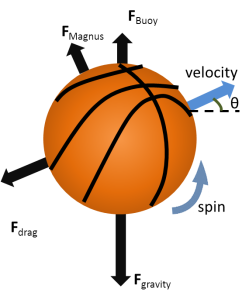

Dla siły oporu powietrza zakładamy, że jest proporcjonalna do kwadratu prędkości $\vec{v} = |\vec{v}|\hat{v}$ . Wtedy siła oporu powietrza przyjmuje równanie:
    $$\newline$$
        $$\vec{F}_{o} = -C_{X}\rho A|\vec{v}|^2\hat{v} = -C_{X}\rho A|\vec{v}|\vec{v} = -C_{X}\rho A\sqrt{\dot{x}^2 + \dot{y}^2}(\dot{x}\hat{i}+\dot{y}\hat{j})$$
        
Po zauważeniu, że $C_{X}\rho A$ jest stałą, dla uproszczenia zapisu zamienimy na $b$ i otrzymamy równanie: 
$\newline$
$$\vec{F}_{o} = -C_{X}\rho A\sqrt{\dot{x}^2 + \dot{y}^2}(\dot{x}\hat{i}+\dot{y}\hat{j}) = -b\sqrt{\dot{x}^2 + \dot{y}^2}(\dot{x}\hat{i}+\dot{y}\hat{j})$$    
</span>

In [4]:
b = CX*ro*A


### Siła wyporu
___

<span style='font-family:"Arial"'>
Siłę wyporu, która działa wzdłóż osi y, obliczymy za pomocą prawa Archimedesa:
    $$\newline$$
$$\vec{F}_w = \rho Vg\hat{j}$$
    
Ale ponieważ $\rho Vg$ jest stałą to oznaczymy ją jako $B$ i po zastosowaniu wzór przyjmuje równanie:
    $\newline$
$$\vec{F}_w = B\hat{j}$$
</span>

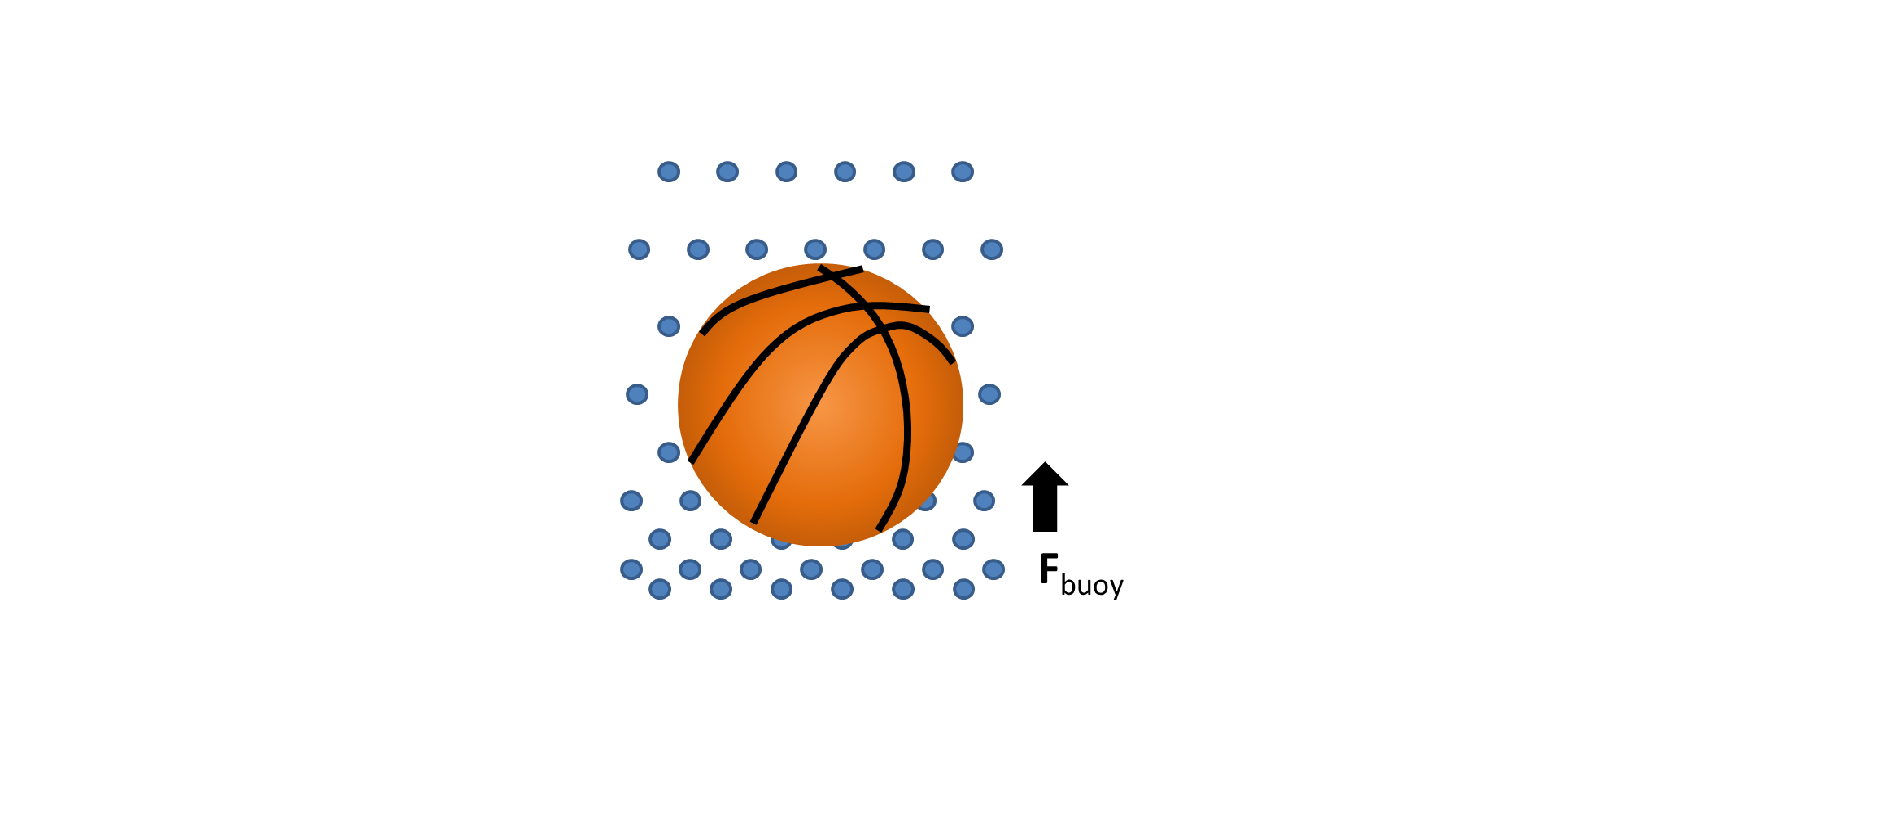

### Siła Magnusa
___

<span style='font-family:"Arial"'>
   Podczas rzutu piłka, piłka zaczyna się obracać i w ten sposób powstaje ostatnia siła, która oddziałowuje na piłke. Kierunek siły Magnusa jest wynikiem iloczynu wektorowego $\vec{\omega}\times\vec{v}$ . (Nie wiem czy dodać to co jest w projekcie poprzednim). Siła Magnusa jest podana wzorem:
    $\newline$
   $$\vec{F}_{\text{Magnus}}=C_{Z}\rho D^3\vec{\omega}\times\vec{v}$$ 
    
dla uproszczenia zastąpimy $C_{Z}\rho D^3$ = $c$.Zatem teraz wzór przyjmuje postać:
    $\newline$
    $$\vec{F}_{\text{Magnus}}=c\vec{\omega}\times\vec{v}=c\omega(-\dot{y}\hat{i} + \dot{x}\hat{j})$$
    
</span>

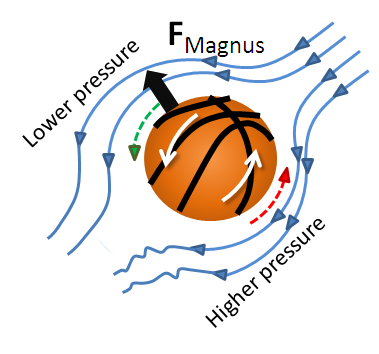

In [5]:
c = CL*ro*pow(D,3)


<span style='font-family:"Arial"'>
Teraz łącząc wszystkie modele i wykorzystując równanie Newtona otrzymujemy:
$\newline$
$$ma = m\dot{\vec{v}}=m(\ddot{x}\hat{i}+\ddot{y}\hat{j})=(-b\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}-p\dot{y}\omega)\hat{i}+(-mg-b\dot{y}\sqrt{\dot{x}^2+\dot{y}^2}+B+p\dot{x}\omega)\hat{j}$$

Z tego możemy ułożyć równania różniczkowe:
$\newline$
$$\begin{cases}
m\ddot{x}&=-b\dot{x}\sqrt{\dot{x}^2+\dot{y}^2}-p\dot{y}\omega\\
m\ddot{y}&=-mg-b\dot{y}\sqrt{\dot{x}^2+\dot{y}^2}+B+p\dot{x}\omega
\end{cases}$$
</span>

In [6]:

Fx = lambda dx,dy,w : -b*dx*sqrt(pow(dx,2)+pow(dy,2),2)-ro*dy*w

Fy = lambda dx,dy,w : -mg-b*dy*sqrt(pow(dx,2)+pow(dy,2),2)+B+ro*dx*w

def F(dx,dy,w):
    return dx,Fx(dx,dy,w)/m,dy,Fy(dx,dy,w)/m



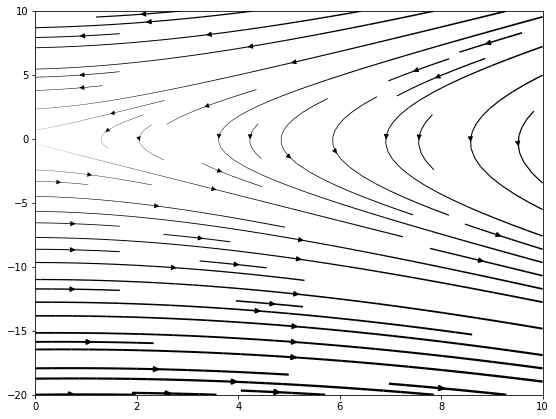

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import sqrt, pow, pi, cos, sin
w = 4*pi
def dF(x, y,w):
    return (-b*x*((x**2 + y**2)**0.5)-ro*y*w)/m, -g-(b*y*((x**2 + y**2)**0.5) + B + ro*w*x)/m
X, Y = np.meshgrid(np.linspace(0.0, 10.0), np.linspace(-20.0, 10.0))
C, V = X, Y
dX, dY = dF(C, V,w)
speed = np.sqrt(dX**2 + dY**2)
lw = 5 * speed / speed.max()
fig = plt.figure(figsize = (20,24))
gs = gridspec.GridSpec(nrows = 3, ncols = 2, height_ratios =[1, 1, 1])
ax= fig.add_subplot(gs[0,0])
ax.streamplot(X, Y, dX, dY, color='k',linewidth=lw/2, density=[0.5,1])
plt.show()

<span style='font-family:"Arial"'>
Na wykresie widać jak bardzo na duże prędkości wpływa opór powietrza. Widać też że na prędkość ma największy wpływ składowa y, w takim razie dużo zależy od prędkości poziomej. Dodatkowo przy y=0 widać najmocniejsze załamanie prędkości i zmiane kierunku wektora.
</span>

# 4 Metody numeryczne

##  Metoda Rungego-Kutty dla IV rzędu

<span style='font-family:"Arial"'>
Do rozwiązania równań różniczkowych użyjemy metody numerycznej, a dokładniej metody Rungego-Kutty dla IV rzędu.
załóżmy że $x_{1}=x$ oraz $y_{1}=y$:

Z tego możemy ułożyć równania różniczkowe:
$\newline$
$$\begin{cases}
\dot{x_1}&=x_2\\
\dot{x_2}&=\frac{-bx_2\sqrt{x_2^2+y_2^2}-py_2\omega}{m}\\
\dot{y_1}&=y_2\\
\dot{y_2}&=\frac{-mg-by_2\sqrt{x_2^2+y_2^2}+B+px_2\omega}{m}
\end{cases}$$
</span>

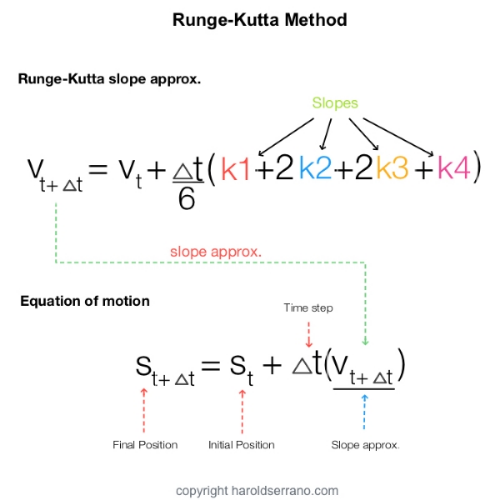

In [8]:
#jakaś funkcja, która zwraca jedną wartość, potem dodam możliwość zwracania położenia
def f(x,y):
    return ((x-y)/2)

def runge_kutta(f, t:list):
    
    t_0 = np.linspace(t[0], t[1])
    h = (t_0[-1]-t_0[0])/len(t_0)
    y = y_0 
    for i in range(len(t_0)):
        k_1 = h*f(t_0[i], y)
        k_2 = h*f(t_0[i]+k_1/2, y+h/2)
        k_3 = h*f(t_0[i]+k_2/2, y+h/2)
        k_4 = h*f(t_0[i]+k_3/2, y+h/2)
        y = y+1/6*(k_1+2*k_2+2*k_3+k_4)

    return y

# W końcu się udało

In [9]:
def add_to_list(lis, lis2,n=1):


    check_list = []
    for j in range(len(lis)):
        to_list = lis[j]+lis2[j]/n
        check_list.append(to_list)
    return check_list

def multiply_list(lis, n):
    check_list = []
    for i in range(len(lis)):
        to_list = lis[i]*n
        check_list.append(to_list)
    return check_list


def rungekutta4(f, t, li):
    t_range = np.linspace(0,t,1000)
    values = [li]
    h = (t[-1]-t[0])/len(t)
    for i in range(len(t_range)):
        
        k1 = multiply_list(f(t_range[i], values[i]),h)
        k2 = multiply_list(f(t_range[i] + h/2, add_to_list(values[i], k1, 2)),h)
        k3 = multiply_list(f(t_range[i] + h/2, add_to_list(values[i], k2, 2)), h)
        k4 = multiply_list(f(t_range[i] + h, add_to_list(values[i], k3,1)),h)
        
        
        k1k2 = add_to_list(k1,k2,2)
        k3k4 = add_to_list(k4,k3,2)
        
        k1k2k3k4 = add_to_list(k1k2,k3k4)
        for j in range(len(k1k2k3k4)):
            k1k2k3k4[j] = k1k2k3k4[j]/6 
        values.append(add_to_list(values[i], k1k2k3k4))
        print(values[i][0])
    
    return values

def plot_throw(t, v_0, O_0, w):
    r_0 = O_0/180*pi
    x_0  = 0
    li = [x_0, v_0*cos(r_0), y_0, v_0*sin(r_0),w]
    t_range = np.linspace(0,t,t*100)
    sol = rungekutta4(Function, t_range, li)
    return sol
    
    
def Fx(dx,dy):
    return -b*dx*((dx**2 + dy**2)**0.5)-ro*dy*w

def Fy(dx,dy):
    return -g*m-b*dy*((dx**2 + dy**2)**0.5) + B + ro*w*dx

def Function(t,lis):
    x1,x2,y1,y2,w = lis
    return [x2, Fx(x2,y2)/m, y2, Fy(x2,y2)/m,0]

plot_throw(3,8,50,4*pi)

NameError: name 'y_0' is not defined

# Symulacja

## Tworzenie boiska

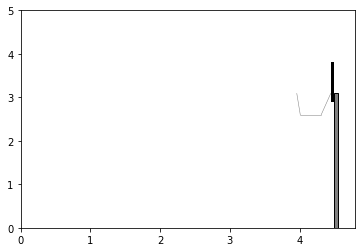

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
h = 1.91
free_throw_line_x = 3.96
y_rim = 3.09
R_rim = 0.009
R_hoop = 0.23
x_rim_front = free_throw_line_x + R_rim
x_rim_back = x_rim_front + 2*(R_hoop + R_rim)
y_board = 2.9
h = 0.91
x_board = x_rim_back + R_rim

rim_width = x_rim_back-x_rim_front
rim_h = 0.018
def plot_pitch():
    #rim
    fig,ax = plt.subplots()
    ax.plot()
    ax.add_patch(Rectangle((free_throw_line_x, y_rim), rim_width , rim_h, facecolor = 'red'))
    plt.xlim(0,4.8)
    plt.ylim(0,5)
    #board
    ax.add_patch(Rectangle((x_board,y_board),rim_h*2, h,facecolor = 'black'))
    #pipe
    ax.add_patch(Rectangle((x_board+rim_h*2, 0), rim_h*3, y_rim, facecolor = 'grey', edgecolor = 'black'))
    #net
    ax.plot([free_throw_line_x, free_throw_line_x+0.05], [y_rim, 2.60], color = 'gray', linewidth =0.5)
    ax.plot([free_throw_line_x+0.05, free_throw_line_x+0.35], [2.60,2.60], color = 'gray', linewidth =0.5)
    ax.plot([free_throw_line_x+0.35, x_rim_back], [2.6, y_rim], color = 'gray', linewidth =0.5)
    plt.show()
plot_pitch()

# Literatura
___
https://physicsofbasketball.wordpress.com/2014/05/18/forces-acting-on-a-basketball-in-flight/ 

Ogónie tu jest dużo fajnego materiału:
https://arxiv.org/pdf/1702.07234.pdf

Informacje o piłce: https://ballergears.com/how-much-does-a-basketball-weigh/ 

Reszta uzupełniająca: https://iopscience.iop.org/article/10.1088/1367-2630/16/3/033039/pdf

https://core.ac.uk/download/pdf/81927888.pdf

Współczynnik Magnusa:
https://www.grc.nasa.gov/www/k-12/airplane/soclift.html

Kosz:

https://pl.wikipedia.org/wiki/Tablica_(koszyk%C3%B3wka)

Grafika do 1.2:

https://www.dimensions.com/element/basketball-rims-nets

https://www.dimensions.com/element/basketball-court

Modele 3.1

https://digitalshowcase.oru.edu/cgi/viewcontent.cgi?article=1063&context=cose_pub

Metody numeryczne

https://www.haroldserrano.com/blog/visualizing-the-runge-kutta-method

https://www.dimensions.com/element/basketball-rims-nets

In [ ]:
print('zmiana')